In [1]:
%config IPCompleter.greedy=True

Given a dataset that contains information about different types of flowers (e.g., Iris dataset), perform classification using the k-Nearest Neighbors (kNN) algorithm. Evaluate the performance of the model by calculating its accuracy and visualize the results using appropriate techniques.

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [80]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
X = df[["petal length (cm)", "petal width (cm)"]]
Y = df['target']

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [85]:
Y_pred = knn.predict(X_test)

In [86]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [87]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n {class_report}")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

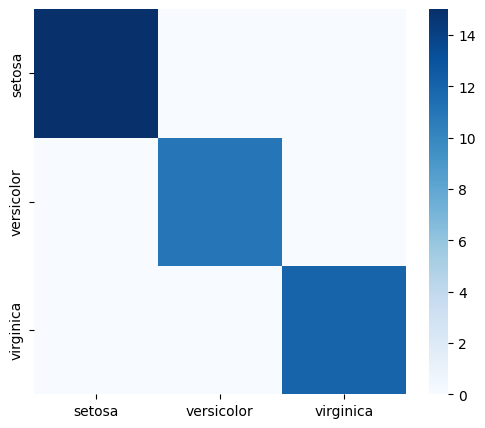

In [88]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)

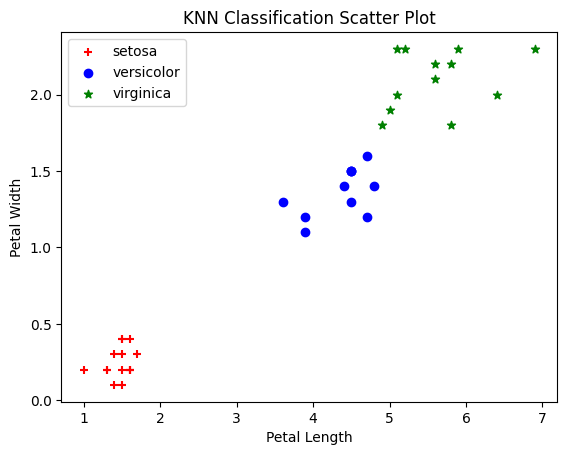

In [89]:
colors = ["r", "b", "g"]
markers = ["+", "o", "*"]

for i, label in enumerate(iris.target_names):
    class_points = (Y_pred == i)    
    plt.scatter(X_test.iloc[class_points, 0], X_test.iloc[class_points, 1], marker=markers[i], color=colors[i], label=label)

plt.title("KNN Classification Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()